<a href="https://colab.research.google.com/github/solver768/Machine-learning-programs/blob/main/MachineLearningLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import statistics
def cal_mean(data):
  return sum(data)/len(data)
def cal_median(data):
  n=len(data)
  if(n%2==0):
    m1=data[n//2]
    m2=data[(n//2)+1]
    return (m1+m2)/2
  else:
    return data[n//2]
def cal_mode(data):
  return statistics.mode(data)
def cal_varience(data):
  mean=cal_mean(data)
  varience=sum((x-mean)**2 for x in data)/len(data)
  return varience
def cal_SD(data):
  varience=cal_varience
  SD=statistics.stdev(data)
  return SD
data=[10,20,30,40,50]
print('Mean:',cal_mean(data))
print('Median:',cal_median(data))
print('Mode:',cal_mode(data))
print('Varience:',cal_varience(data))
print('Standard Deviation:',cal_SD(data))

Mean: 30.0
Median: 30
Mode: 10
Varience: 200.0
Standard Deviation: 15.811388300841896


In [10]:
pip install scikit-learn


In [11]:
pip install pandas

In [14]:
import pandas as pd
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.datasets import load_iris
data=load_iris()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target)
selector=SelectKBest(score_func=f_classif,k=3)
x_selected=selector.fit_transform(x,y)
print("The selected fretures are:",x.columns[selector.get_support()])

The selected fretures are: Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')


In [17]:
import numpy as np
import pandas as pd
data={
    'a':[1,2,np.nan,4],
    'b':[np.nan,2,3,4],
    'c':[1,2,3,4]
}
df=pd.DataFrame(data)
data_filled=df.fillna(df.mean())
data_dropped=df.dropna()
print("Filled data:\n",data_filled)
print("Dropped data:\n",data_dropped)

Filled data:
           a    b  c
0  1.000000  3.0  1
1  2.000000  2.0  2
2  2.333333  3.0  3
3  4.000000  4.0  4
Dropped data:
      a    b  c
1  2.0  2.0  2
3  4.0  4.0  4


In [20]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
data={
    'A':[10,20,30,40,50]
    }
df=pd.DataFrame(data)
discretizer=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
df['A_Binned']=discretizer.fit_transform(df)
print("discretized data:\n",df)

discretized data:
     A  A_Binned
0  10       0.0
1  20       0.0
2  30       1.0
3  40       2.0
4  50       2.0


In [26]:
import pandas as pd
data={
    'A':[1,2,3,4,15,20,100]
}
df=pd.DataFrame(data)
q1=df['A'].quantile(0.25)
q3=df['A'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-iqr*1.5
upper_bound=q3+iqr*1.5
data_no_outliers=df[(df['A']>=lower_bound)&(df['A']<=upper_bound)]
print("Data after removing outliers:\n",data_no_outliers)

Data after removing outliers:
     A
0   1
1   2
2   3
3   4
4  15
5  20


In [28]:
pip install matplotlib

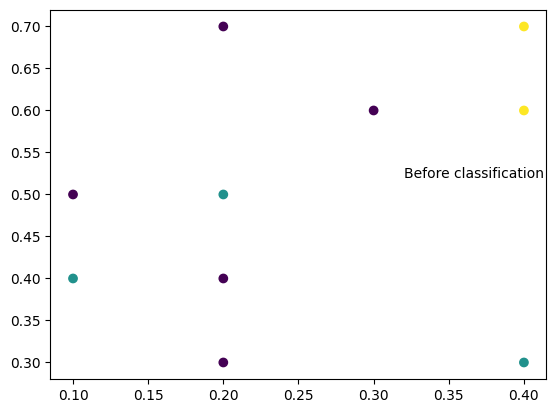

Testing pattern assigned to : [1]


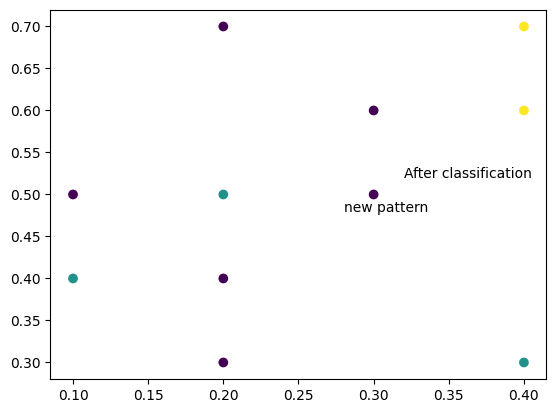

In [42]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
x=[0.1,0.2,0.2,0.2,0.3,0.4,0.2,0.1,0.4,0.4]
y=[0.5,0.4,0.3,0.7,0.6,0.3,0.5,0.4,0.6,0.7]
classes=[1,1,1,1,1,2,2,2,3,3]
knc=KNeighborsClassifier(n_neighbors=3)
features=list(zip(x,y))
model=knc.fit(features,classes)
new_x=0.3
new_y=0.5
new_point=[(new_x,new_y)]
plt.scatter(x,y,c=classes)
plt.text(x=new_x+0.02,y=new_y+0.02,s="Before classification")
plt.show()
p=knc.predict(new_point)
print("Testing pattern assigned to :",p)
plt.scatter(x+[new_x],y+[new_y],c=classes+[p[0]])
plt.text(x=new_x+0.02,y=new_y+0.02,s="After classification")
plt.text(x=new_x-0.02,y=new_y-0.02,s="new pattern")
plt.show()

In [48]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
df=pd.read_csv("example3.csv")
x=df[['feature1','feature2']]
y=df['target']
knr=KNeighborsRegressor(n_neighbors=3)
model1=knr.fit(x.values,y.values)
lr=linear_model.LinearRegression()
model2=lr.fit(x.values,y.values)
new_pattern1=0.5
new_pattern2=0.5
new_point=[(new_pattern1,new_pattern2)]
p1=knr.predict(new_point)
p2=lr.predict(new_point)
print("Prediction using KNN:",p1)
print("Prediction using Linear Regression:",p2)

Prediction using KNN: [10.66666667]
Prediction using Linear Regression: [12.]


|--- feature_0 <= 0.45
|   |--- feature_1 <= 0.50
|   |   |--- class: 8
|   |--- feature_1 >  0.50
|   |   |--- class: 10
|--- feature_0 >  0.45
|   |--- feature_0 <= 0.70
|   |   |--- feature_1 <= 0.30
|   |   |   |--- class: 10
|   |   |--- feature_1 >  0.30
|   |   |   |--- class: 12
|   |--- feature_0 >  0.70
|   |   |--- feature_0 <= 0.90
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 14
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 16
|   |   |--- feature_0 >  0.90
|   |   |   |--- class: 19



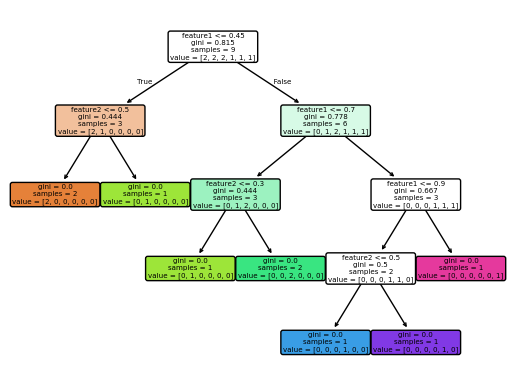

In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib as plt
df=pd.read_csv("example3.csv")
features=df[['feature1','feature2']]
tartget=df['target']
dtc=DecisionTreeClassifier()
model=dtc.fit(features,tartget)
plot_tree(model,feature_names=features.columns,filled=True,rounded=True)
text=tree.export_text(dtc)
print(text)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


predicted: [10.]


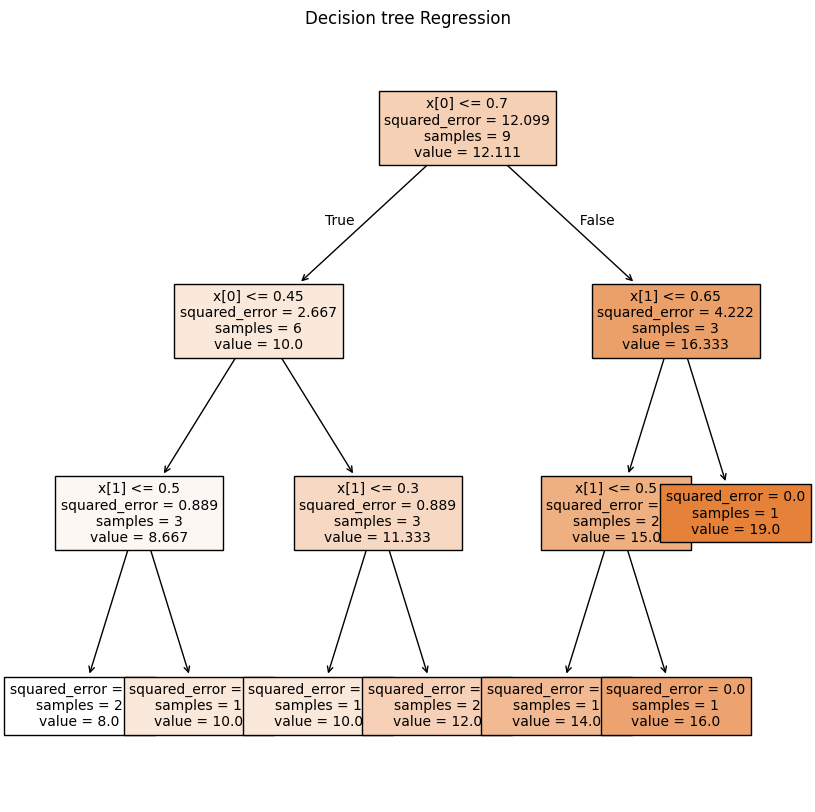

In [61]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
df=pd.read_csv("example3.csv")
features=df[['feature1','feature2']]
target=df['target']
dtr=DecisionTreeRegressor()
model=dtr.fit(features,target)
new_feature1=0.5
new_feature2=0.2
new_point=[(new_feature1,new_feature2)]
p=dtr.predict(new_point)
print("predicted:",p)
plt.figure(figsize=(10,10))

tree.plot_tree(dtr,filled=True,fontsize=10)
plt.title("Decision tree Regression")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted: 8.8


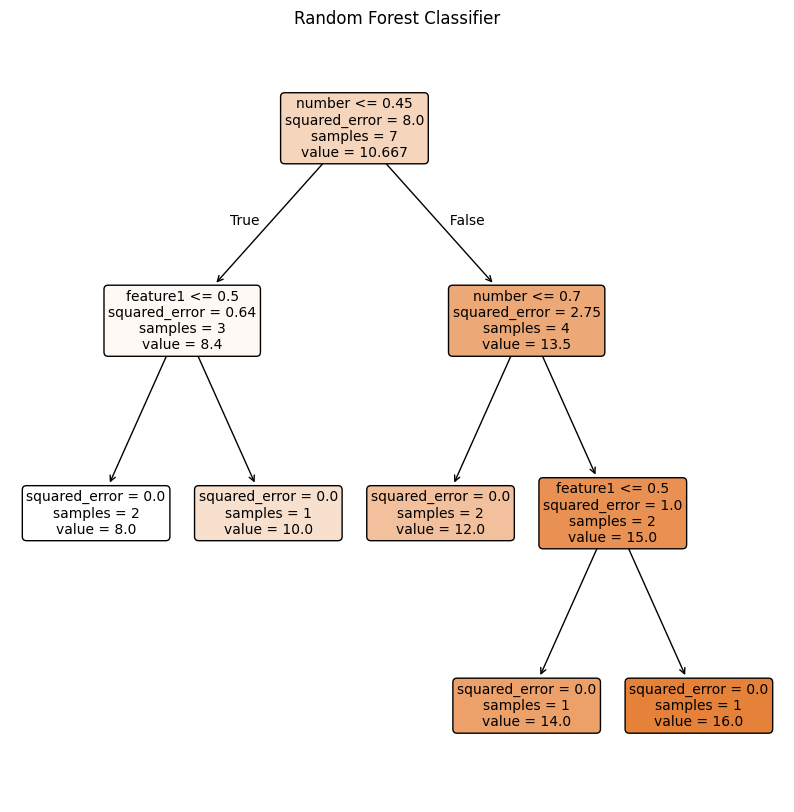

In [82]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("example3.csv")

# Prepare features and target
features = df[['feature1', 'feature2']]
target = df['target']

# Create and train the Random Forest Classifier
rfc = RandomForestRegressor()
model = rfc.fit(features, target)
new_x=0.3
new_y=0.4
new_point=[(new_x,new_y)]
# Make a prediction
p = rfc.predict(new_point)
# Print the predicted value as a single number
print("Predicted:", p[0])  # Access the first element of the prediction array

# Visualize one of the decision trees
plt.figure(figsize=(10, 10))
plot_tree(model.estimators_[0], feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Random Forest Classifier")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0
Predicted: [2]


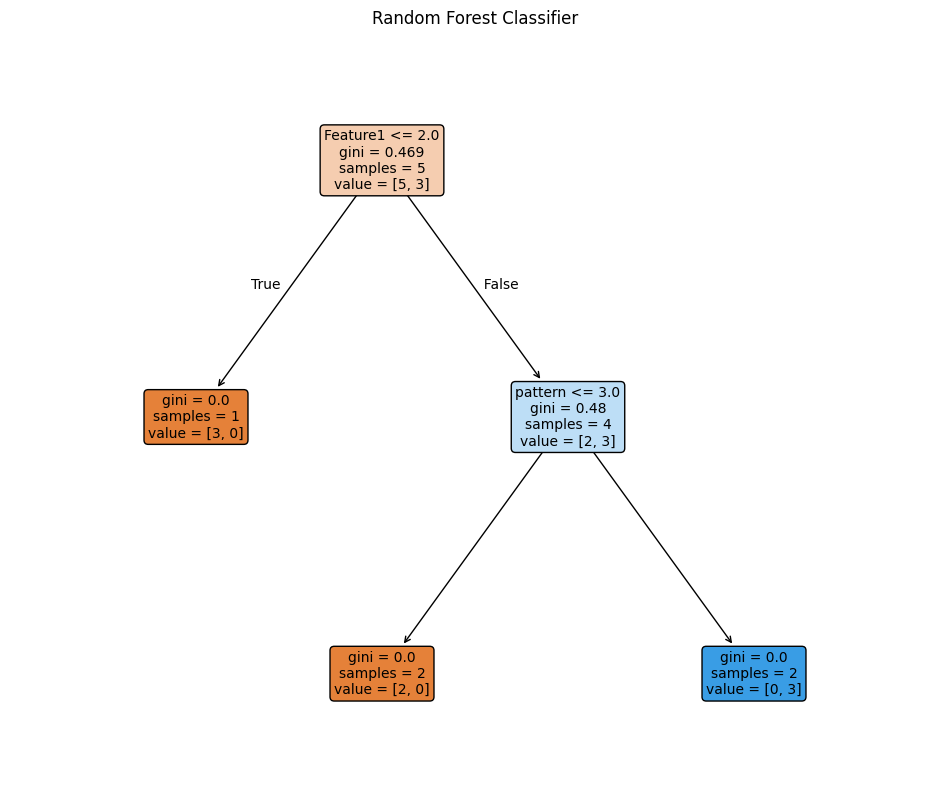

In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
df=pd.read_csv("example1.csv")
features=df[['Feature1','Feature2']]
target=df['Class']
rc=RandomForestClassifier()
model=rc.fit(features,target)
new_feature1=5
new_feature2=2
new_point=[(new_feature1,new_feature2)]
p=rc.predict(new_point)
print("Accuracy:",metrics.accuracy_score([new_feature2],p))
print("Predicted:",p)
plt.figure(figsize=(12,10))
plot_tree(model.estimators_[0],feature_names=df.columns.tolist(),filled=True,rounded=True,fontsize=10)
plt.title("Random Forest Classifier")
plt.show()

In [86]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
df=pd.read_csv("example6.csv")
features=df[['feature1','feature2','feature3']]
target=df['class']
nb=MultinomialNB()
model=nb.fit(features,target)
new_feature1=1
new_feature2=0
new_feature3=1
new_point=[(new_feature1,new_feature2,new_feature3)]
p=nb.predict(new_point)
print("Predicted:",p)


Predicted: ['c1']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


Predicted: [-1]
support vectors are: [[2. 1.]
 [1. 3.]
 [6. 3.]]


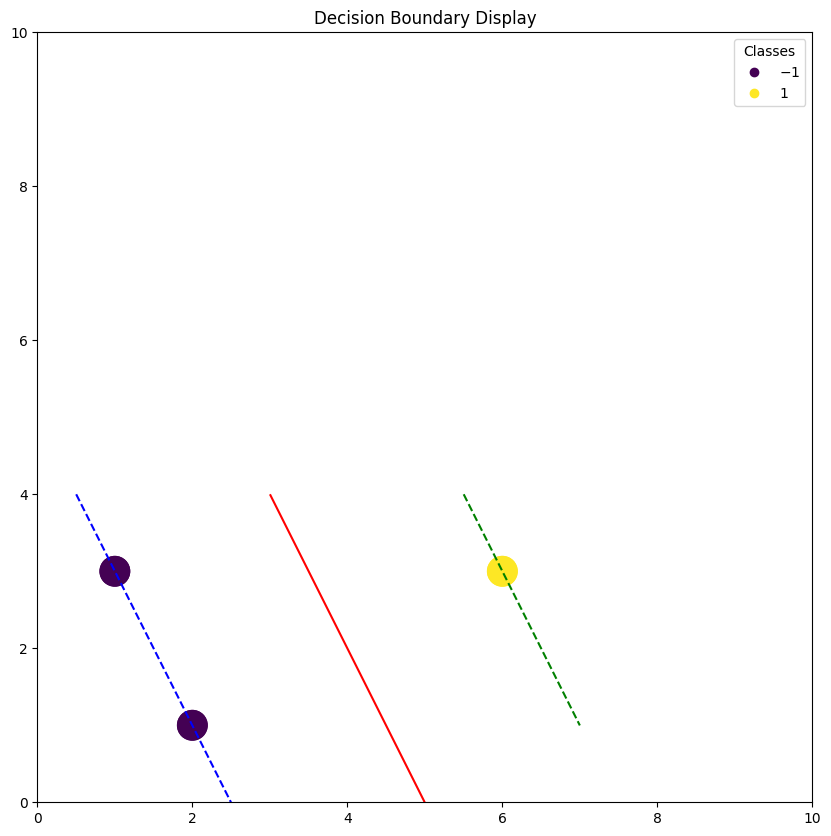

In [95]:
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
X=np.array([[2,1],[1,3],[6,3]])
y=np.array([-1,-1,1])
sv=SVC(kernel='linear')
model=sv.fit(x,y)
new_x=2
new_y=0
new_point=[(new_x,new_y)]
p=sv.predict(new_point)
print("Predicted:",p)
print("support vectors are:",sv.support_vectors_)
def plot_Decision_boundary():
  fig,ax=plt.subplots(figsize=(10,10))
  x_min,x_max,y_min,y_max=0,10,0,10
  ax.set(xlim=(x_min,x_max),ylim=(y_min,y_max))
  comman_params={
      "estimator":sv,'X':X,'ax':ax
  }
  DecisionBoundaryDisplay.from_estimator(
      **comman_params,
      plot_method="contour",
      levels=[-1,0,1],
      colors=['b','r','g'],
      linestyles=['--','-','--']
  )
  sc=ax.scatter(X[:,0],X[:,1],c=y,s=450)
  ax.scatter(X[:,0],X[:,1],c=y,s=450)
  ax.legend(*sc.legend_elements(),loc="upper right",title="Classes")
  ax.set_title("Decision Boundary Display")
  plt.show()
plot_Decision_boundary()

In [99]:
import numpy as np
from sklearn.linear_model import LinearRegression
x=np.array([[1,1],[1,2],[2,2]])
y=np.array([3,5,6])
lr=LinearRegression()
model=lr.fit(x,y)
new_x=2
new_y=1
new_point=[(new_x,new_y)]
prediction=model.predict(new_point)
print(prediction)
w=lr.coef_
b=lr.intercept_
print(w,b)

[4.]
[1. 2.] 0.0


In [100]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
x=np.array([[1,1],[1,2],[3,1],[2,2]])
y=np.array([0,0,1,1])
lor=LogisticRegression()
lor.fit(x,y)
new_x=2
new_y=1
new_point=[(new_x,new_y)]
p=lor.predict(new_point)
print(p)
w=lor.coef_
print(w)
b=lor.intercept_
print(b)

[1]
[[0.91999442 0.08255483]]
[-1.71952454]
